In [1]:
# Load the bins statistics for all the grouped pairs 
import json

f_name = "Bins_Stats_EdgeList_TLD_step_3.json"

with open(f_name, "r") as fp:
    data = json.load(fp)

### Load the service type of the TLD / legal entities

In [2]:
# Load the mapping between the nodes and the services that they provide
import Service_Type as service

# To hold the statistics of the different grouping types
STATS = {}

T = service.TYPES

for e in data["pairs"]:
    bin = e["bin"]
    # Initialize stats for a specific bin
    if bin not in STATS:
        STATS[bin] = {"comp": 0, "not_comp": 0}
    # Check if the pairs have complimentary service type or not
    if e["tld_src"] in T:
        M_SRC = T[e["tld_src"]]
    if e["tld_dst"] in T:
        M_DST = T[e["tld_dst"]]
    if M_SRC == M_DST:
        STATS[bin]["not_comp"] += 1
    else:
        STATS[bin]["comp"] += 1

In [3]:
# Prepare plot data
labels = []
comp = []
not_comp = []
for b in STATS:
    labels.append(b)
    comp.append(STATS[b]['comp'])
    not_comp.append(STATS[b]['not_comp'])

print("Labels: {}\nComp: {}\nNot_comp: {}".format(len(labels), len(comp), len(not_comp)))

Labels: 18
Comp: 18
Not_comp: 18


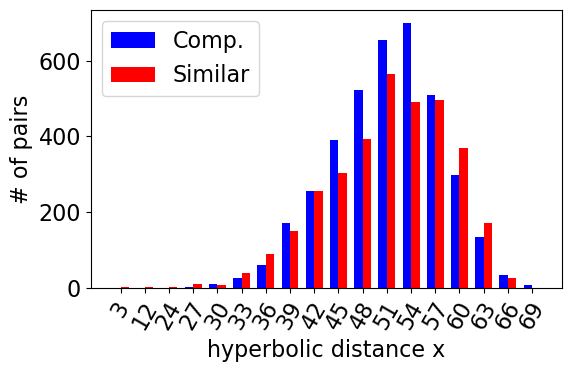

In [4]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages

font = {'family': 'DejaVu Sans',
        'weight': 'normal',
        'size'  : 16}
matplotlib.rc('font', **font)

pp = PdfPages("Comp_Vs_Similar_All.pdf")
width = 0.35
X = np.arange(len(labels))
fig, ax1 = plt.subplots(figsize=(6, 4), dpi=100)

plt.bar(X, comp, width, color="b", label="Comp.")
plt.bar(X + width, not_comp, width, color="r", label="Similar")
plt.xlabel('hyperbolic distance x')
plt.ylabel("# of pairs")
plt.xticks(X + width / 2, labels, rotation=60)
plt.legend(loc='best')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig(pp, format='pdf')
pp.close()

# Future grouping

In [5]:
# Load the bins statistics for the FUTURE grouping pairs 
import json

f_name = "Bins_Stats_EdgeList_TLD_FUTURE_step_6.json"

with open(f_name, "r") as fp:
    data_f = json.load(fp)

In [6]:
# Load the mapping between the nodes and the services that they provide
import Service_Type as service

# To hold the statistics of the different grouping types
STATS_F = {}
T = service.TYPES

for e in data_f["pairs"]:
    bin = e["bin"]
    # Initialize stats for a specific bin
    if bin not in STATS_F:
        STATS_F[bin] = {"comp": 0, "not_comp": 0}
    # Check if the pairs have complimentary service type or not
    if e["tld_src"] in T:
        M_SRC = T[e["tld_src"]]
    if e["tld_dst"] in T:
        M_DST = T[e["tld_dst"]]
    if M_SRC == M_DST:
        STATS_F[bin]["not_comp"] += 1
    else:
        STATS_F[bin]["comp"] += 1

In [7]:
# Prepare plot data
labels_f = []
comp_f = []
not_comp_f = []
for b in STATS_F:
    labels_f.append(b)
    comp_f.append(STATS_F[b]['comp'])
    not_comp_f.append(STATS_F[b]['not_comp'])

print("Labels: {}\nComp: {}\nNot_comp: {}".format(len(labels_f), len(comp_f), len(not_comp_f)))

Labels: 6
Comp: 6
Not_comp: 6


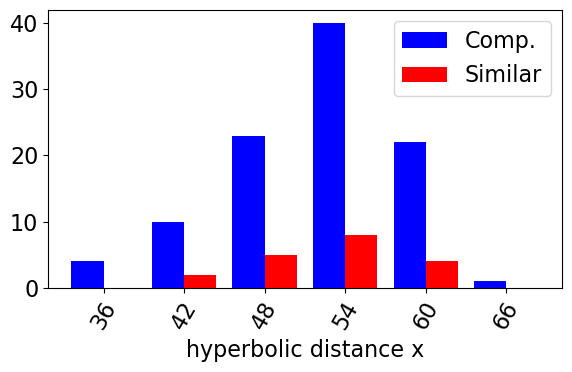

In [8]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages

font = {'family': 'DejaVu Sans',
        'weight': 'normal',
        'size'  : 16}
matplotlib.rc('font', **font)

pp = PdfPages("Comp_Vs_Similar_Future.pdf")
width = 0.4
X = np.arange(len(labels_f))
fig, ax1 = plt.subplots(figsize=(6, 4), dpi=100)

plt.bar(X, comp_f, width, color="b", label="Comp.")
plt.bar(X + width, not_comp_f, width, color="r", label="Similar")
plt.xlabel('hyperbolic distance x')
plt.xticks(X + width / 2, labels_f, rotation=60)
plt.legend(loc='best')

fig.tight_layout()
plt.savefig(pp, format='pdf')
pp.close()